# Questão 01

![alt text](<Questão 1.png>)


== Posição final x(10s) para cada método ==
Euler explícito (simples):    x = 360.565775121719 m
Euler com append:             x = 360.565775121719 m
Euler pré-alocado:            x = 360.565775121719 m
Runge-Kutta 4ª ordem:         x = 360.521852348012 m

Tempos de execução (segundos) para cada método:
+---------+-------------------+--------------------+---------------------+-----------------+
|       N |   Euler explícito |   Euler com append |   Euler pré-alocado |   Runge-Kutta 4 |
+=========+===================+====================+=====================+=================+
|    1000 |         0.0002573 |          0.0001372 |           0.0001066 |       0.0006492 |
+---------+-------------------+--------------------+---------------------+-----------------+
|   10000 |         0.0008241 |          0.0010822 |           0.0009767 |       0.0066814 |
+---------+-------------------+--------------------+---------------------+-----------------+
|  100000 |         0.0077174 |          0.

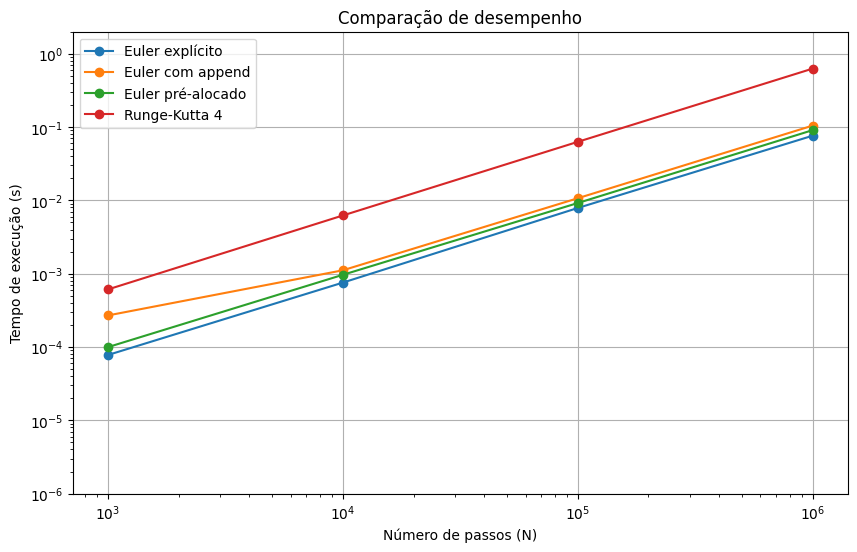

In [50]:
import numpy as np
import time
from tabulate import tabulate
import matplotlib.pyplot as plt

# Constantes
g = 9.8
k = 0.1
v0 = 0.0
x0 = 0.0
t_final = 10

# Métodos numéricos
def euler_explicito(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
    return x

def euler_append(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    x_list = [x]
    for _ in range(N):
        v += (g - k * v) * dt
        x += v * dt
        x_list.append(x)
    return x_list[-1]

def euler_pre_alocado(dt, t_final):
    N = int(t_final / dt)
    v = np.zeros(N + 1)
    x = np.zeros(N + 1)
    v[0], x[0] = v0, x0

    vi, xi = v0, x0
    for i in range(N):
        a = g - k * vi
        vi += a * dt
        xi += vi * dt
    return xi

def runge_kutta(dt, t_final):
    N = int(t_final / dt)
    v, x = v0, x0
    for _ in range(N):
        k1v = (g - k * v) * dt
        k1x = v * dt

        k2v = (g - k * (v + k1v / 2)) * dt
        k2x = (v + k1v / 2) * dt

        k3v = (g - k * (v + k2v / 2)) * dt
        k3x = (v + k2v / 2) * dt

        k4v = (g - k * (v + k3v)) * dt
        k4x = (v + k3v) * dt

        v += (k1v + 2 * k2v + 2 * k3v + k4v) / 6
        x += (k1x + 2 * k2x + 2 * k3x + k4x) / 6
    return x

# Funções de comparação
def comparar_resultados():
    dt = 0.001
    x1 = euler_explicito(dt, t_final)
    x2 = euler_append(dt, t_final)
    x3 = euler_pre_alocado(dt, t_final)
    x4 = runge_kutta(dt, t_final)

    print("\n== Posição final x(10s) para cada método ==")
    print(f"Euler explícito (simples):    x = {x1:.12f} m")
    print(f"Euler com append:             x = {x2:.12f} m")
    print(f"Euler pré-alocado:            x = {x3:.12f} m")
    print(f"Runge-Kutta 4ª ordem:         x = {x4:.12f} m")

def comparar_metodos():
    N_values = [10**3, 10**4, 10**5, 10**6]
    methods = [
        ("Euler explícito", euler_explicito),
        ("Euler com append", euler_append),
        ("Euler pré-alocado", euler_pre_alocado),
        ("Runge-Kutta 4", runge_kutta)
    ]

    table_data = []
    headers = ["N"] + [name for name, _ in methods]

    for N in N_values:
        dt = t_final / N
        row = [N]
        for _, method in methods:
            t0 = time.perf_counter()
            method(dt, t_final)
            elapsed = time.perf_counter() - t0
            row.append(f"{elapsed:.6e}")
        table_data.append(row)

    print("\nTempos de execução (segundos) para cada método:")
    print(tabulate(table_data, headers=headers, tablefmt="grid"))

    # Plot
    plt.figure(figsize=(10, 6))
    for name, method in methods:
        times = []
        for N in N_values:
            dt = t_final / N
            t0 = time.perf_counter()
            method(dt, t_final)
            times.append(time.perf_counter() - t0)
        plt.plot(N_values, times, 'o-', label=name)

    plt.xscale('log')
    plt.yscale('log')
    plt.ylim(1e-6, 2)  # Garante que todos os tempos apareçam
    plt.xlabel("Número de passos (N)")
    plt.ylabel("Tempo de execução (s)")
    plt.title("Comparação de desempenho")
    plt.legend()
    plt.grid(True)
    plt.show()

# Executar
comparar_resultados()
comparar_metodos()


# Questão 02

![alt text](<Questão 2.png>)

In [53]:
import numpy as np

# Função para resolver por Cramer
def resolver_cramer(a, b, c, d, e, f):
    det = a*d - b*c
    if det == 0:
        raise ValueError("Sistema sem solução única (det=0)")
    x = (e*d - b*f) / det
    y = (a*f - e*c) / det
    return x, y

# Coeficientes do sistema
a, b = 1.000, 1.000
c, d = 1.000, 1.001
e, f = 2.000, 2.001

# --- (a) Resolver pelo método de Cramer
x_cramer, y_cramer = resolver_cramer(a, b, c, d, e, f)
print("(a) Solução por Cramer:")
print(f"x = {x_cramer:.10f}, y = {y_cramer:.10f}")

# --- (b) Resolver com biblioteca NumPy
A = np.array([[a, b], [c, d]])
B = np.array([e, f])
sol_numpy = np.linalg.solve(A, B)
print("\n(b) Solução com numpy.linalg.solve:")
print(f"x = {sol_numpy[0]:.10f}, y = {sol_numpy[1]:.10f}")

# Diferença entre os métodos
print("\nDiferença (Cramer - NumPy):")
print(f"Δx = {x_cramer - sol_numpy[0]:.20e}, Δy = {y_cramer - sol_numpy[1]:.20e}")

# --- (c) Sensibilidade: variações pequenas no coeficiente d
print("\n(c) Sensibilidade da solução:")
for d_modificado in [1.001, 1.0001, 1.00001]:
    A_mod = np.array([[a, b], [c, d_modificado]])
    try:
        sol = np.linalg.solve(A_mod, B)
        print(f"d = {d_modificado:.6f} → x = {sol[0]:.10f}, y = {sol[1]:.10f}")
    except np.linalg.LinAlgError:
        print(f"d = {d_modificado:.6f} → Sistema singular ou mal-condicionado")

# --- (d) Número de condição
cond = np.linalg.cond(A)
print(f"\n(d) Número de condição da matriz A: {cond:.2e}")


(a) Solução por Cramer:
x = 1.0000000000, y = 1.0000000000

(b) Solução com numpy.linalg.solve:
x = 1.0000000000, y = 1.0000000000

Diferença (Cramer - NumPy):
Δx = 0.00000000000000000000e+00, Δy = 0.00000000000000000000e+00

(c) Sensibilidade da solução:
d = 1.001000 → x = 1.0000000000, y = 1.0000000000
d = 1.000100 → x = -8.0000000000, y = 10.0000000000
d = 1.000010 → x = -97.9999999993, y = 99.9999999993

(d) Número de condição da matriz A: 4.00e+03


# Questão 03

![alt text](<Questão 3.png>)

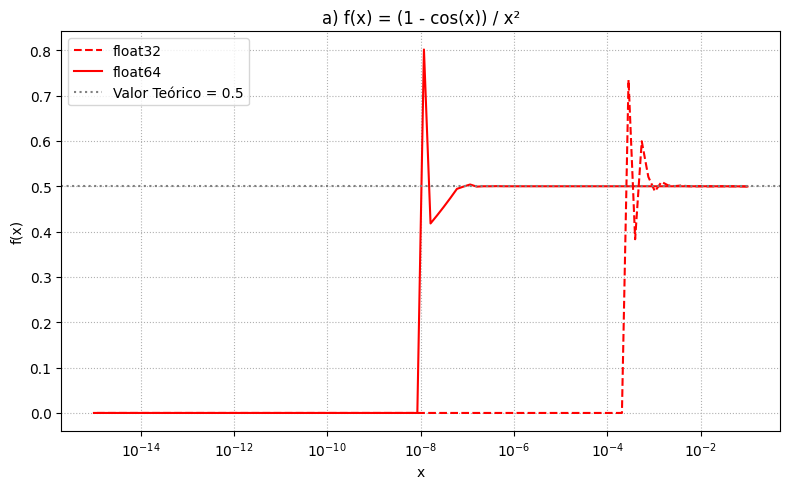

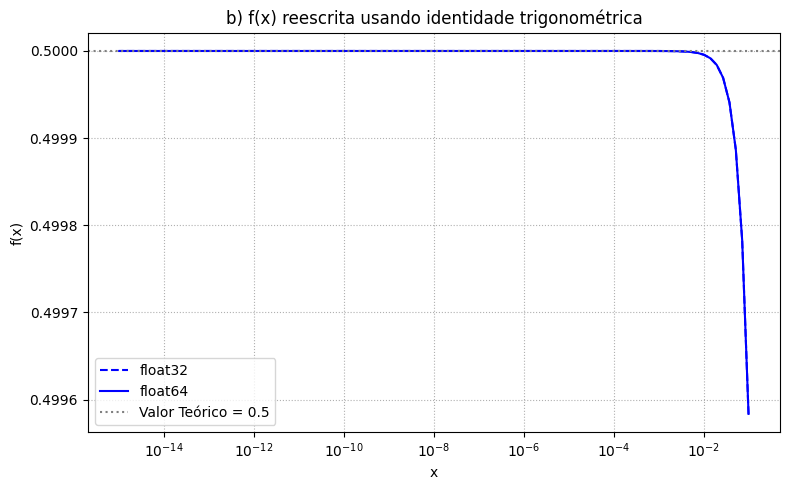

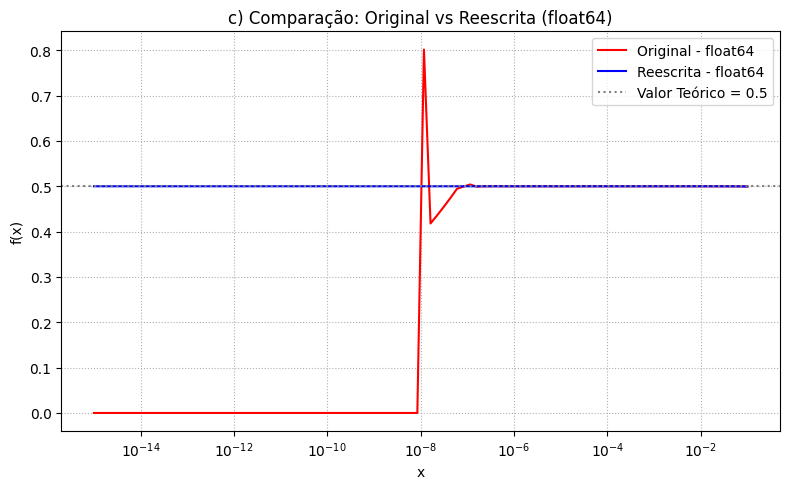

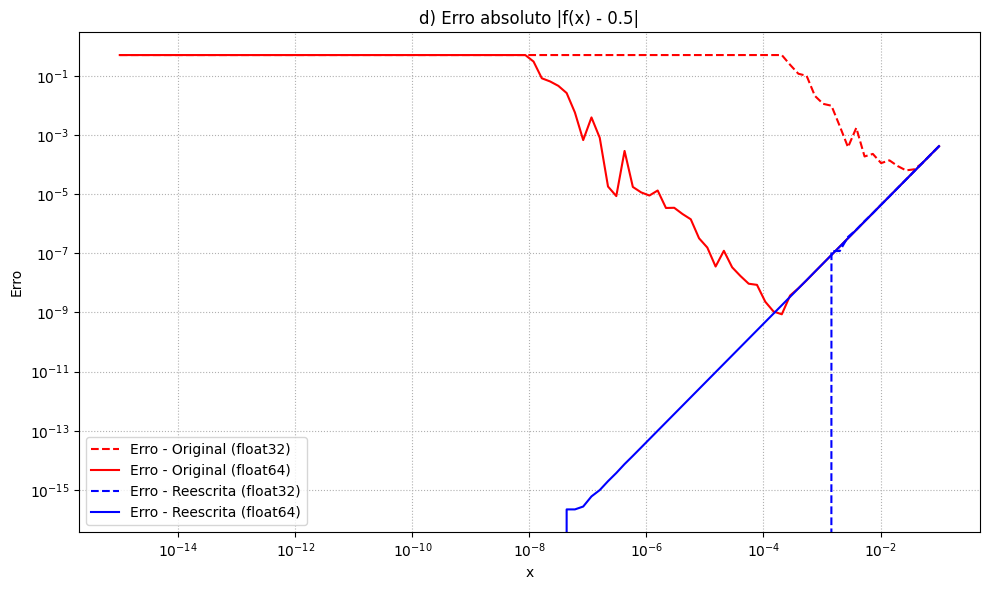

In [55]:
import numpy as np
import matplotlib.pyplot as plt

# x em escala log para valores pequenos
x_vals = np.logspace(-1, -15, 100)
lim_teorico = 0.5

# Funções
def f_original(x):
    return (1 - np.cos(x)) / x**2

def f_reescrita(x):
    return (2 * np.sin(x / 2)**2) / x**2

# a) f_original com float32 e float64
x32 = x_vals.astype(np.float32)
x64 = x_vals.astype(np.float64)
f_orig32 = f_original(x32)
f_orig64 = f_original(x64)

plt.figure(figsize=(8, 5))
plt.semilogx(x_vals, f_orig32, 'r--', label='float32')
plt.semilogx(x_vals, f_orig64, 'r-', label='float64')
plt.axhline(y=lim_teorico, color='gray', linestyle=':', label='Valor Teórico = 0.5')
plt.title('a) f(x) = (1 - cos(x)) / x²')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# b) f_reescrita com float32 e float64
f_reesc32 = f_reescrita(x32)
f_reesc64 = f_reescrita(x64)

plt.figure(figsize=(8, 5))
plt.semilogx(x_vals, f_reesc32, 'b--', label='float32')
plt.semilogx(x_vals, f_reesc64, 'b-', label='float64')
plt.axhline(y=lim_teorico, color='gray', linestyle=':', label='Valor Teórico = 0.5')
plt.title('b) f(x) reescrita usando identidade trigonométrica')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# c) Comparação entre original e reescrita para float64
plt.figure(figsize=(8, 5))
plt.semilogx(x_vals, f_orig64, 'r-', label='Original - float64')
plt.semilogx(x_vals, f_reesc64, 'b-', label='Reescrita - float64')
plt.axhline(y=lim_teorico, color='gray', linestyle=':', label='Valor Teórico = 0.5')
plt.title('c) Comparação: Original vs Reescrita (float64)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()

# d) Erro absoluto em relação ao valor teórico
erro_orig32 = np.abs(f_orig32 - lim_teorico)
erro_orig64 = np.abs(f_orig64 - lim_teorico)
erro_reesc32 = np.abs(f_reesc32 - lim_teorico)
erro_reesc64 = np.abs(f_reesc64 - lim_teorico)

plt.figure(figsize=(10, 6))
plt.loglog(x_vals, erro_orig32, 'r--', label='Erro - Original (float32)')
plt.loglog(x_vals, erro_orig64, 'r-', label='Erro - Original (float64)')
plt.loglog(x_vals, erro_reesc32, 'b--', label='Erro - Reescrita (float32)')
plt.loglog(x_vals, erro_reesc64, 'b-', label='Erro - Reescrita (float64)')
plt.title('d) Erro absoluto |f(x) - 0.5|')
plt.xlabel('x')
plt.ylabel('Erro')
plt.legend()
plt.grid(True, which='both', ls=':')
plt.tight_layout()
plt.show()
